<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/homework-4/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 1 – the basic SVM classifier

[LP] In this homework, we will look at all the data points available in the digits dataset to perform
classification for digit 1 and not digit 1. You are encouraged to reuse your preprocessing code from HW1.
Different from HW1, you should not filter the dataset to remove any digits. Only convert the labels into
labels for binary classification, i.e., ‘1’ and ‘-1’, where ‘-1’ corresponds to digits other than 1. Extract the
“intensity” and “symmetry” for the entire dataset similar to HW1. DO NOT look at the test dataset until
you reach question 4.
For this homework, you may use a library implementation of Support Vector Machine classifiers, e.g., svm
on sklearn provides the SVC class for binary classification.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


In [ ]:
# Load the training dataset
train_data = pd.read_csv('ZipDigits.train', header=None, delim_whitespace=True)

train_data['label'] = train_data[0].apply(lambda x: 1 if x == 1 else -1)

train_data.head()


,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,label
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,-1
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,-1
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,-1
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,-1


In [ ]:
# Define functions to calculate intensity and symmetry features
def intensity(image):
    return np.mean(image[1:])

def symmetry(image):
    left_half = image[0:129]  # Corrected split into left and right halves
    right_half = image[129:]  # Corrected split into left and right halves
    return np.abs(np.sum(left_half - np.flip(right_half)))


In [ ]:
train_data['Intensity'] = train_data.apply(lambda row: intensity(row.values[1:]), axis=1)
train_data['Symmetry'] = train_data.apply(lambda row: symmetry(row.values[1:]), axis=1)


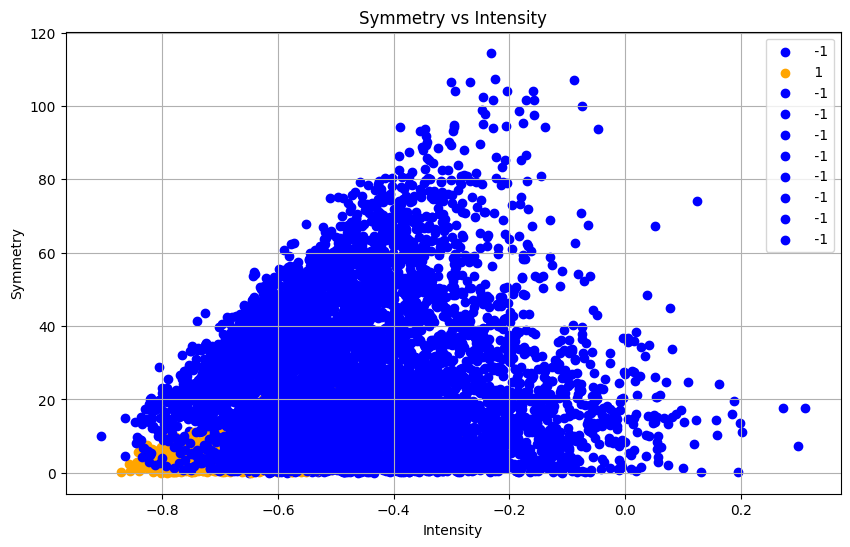

In [ ]:
plt.figure(figsize=(10, 6))
for label, group in train_data.groupby(0):
    if label == 1:
        plt.scatter(group['Intensity'], group['Symmetry'], label=' 1', color='orange')
    else:
        plt.scatter(group['Intensity'], group['Symmetry'], label=' -1', color='blue')

plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.legend(loc='upper right')
plt.title('Symmetry vs Intensity')
plt.grid(True)

#plt.savefig('scatter_plot.png')
plt.show()

In [ ]:
X = train_data[['Intensity', 'Symmetry']]
Y = train_data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


[LP] Use the entire training set and train an SVM classifier using the linear kernel, the polynomial kernel (3 rd
order), and the RBF kernel. Use the default value for the regularization parameter (C=1). Report the
training error on all three kernels

In [ ]:
# Linear Kernel
linear_svm = svm.SVC(kernel='linear', C=1)
linear_svm.fit(X_train, Y_train)
linear_train_preds = linear_svm.predict(X_train)
linear_train_accuracy = accuracy_score(Y_train, linear_train_preds)
print(f"Linear Kernel Training Error: {1 - linear_train_accuracy:.4f}")

# Polynomial Kernel (3rd order)
poly_svm = svm.SVC(kernel='poly', degree=3, C=1)
poly_svm.fit(X_train, Y_train)
poly_train_preds = poly_svm.predict(X_train)
poly_train_accuracy = accuracy_score(Y_train, poly_train_preds)
print(f"Polynomial Kernel Training Error: {1 - poly_train_accuracy:.4f}")

# RBF Kernel
rbf_svm = svm.SVC(kernel='rbf', C=1)
rbf_svm.fit(X_train, Y_train)
rbf_train_preds = rbf_svm.predict(X_train)
rbf_train_accuracy = accuracy_score(Y_train, rbf_train_preds)
print(f"RBF Kernel Training Error: {1 - rbf_train_accuracy:.4f}")

Linear Kernel Training Error: 0.0664
Polynomial Kernel Training Error: 0.1387
RBF Kernel Training Error: 0.1387


[HP] What is the best kernel for this dataset only based on the results above? Is this an appropriate way
to select a model? Why or why not? Be brief in your answer

Only based on the results above, the best kernel for this dataset would be the linear kernel. This isn't really the appropriate way to select the model though, this kernel might perform well on only the training dataset due to overfitting. Poor generalization might lead to great train accuracy but we need to check the model on some seperate test to determine the model accuracy.

##Task 2 – Cross validation

[LP1] Use k-fold cross validation with k = 5 to select the best kernel and regularization parameter among
the following:
Kernel: linear, 3 rd order polynomial, RBF
C: 0.01, 0.1, 1, 10, 100
Note that you will still be working only with the training dataset and splitting it into training and validation
sets. You may use the sklearn’s model selection class that provides you with the k-fold cross validator. You
may also write your own implementation for cross validation.
Report the cross validation error on each combination of kernel and C value.

In [ ]:
param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'C': [0.01, 0.1, 1, 10, 100]}

# SVM + gridsearch cv object
svm_classifier = svm.SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)


cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results[['param_kernel', 'param_C', 'mean_test_score']])
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
best_svm_model = grid_search.best_estimator_

#results
test_preds = best_svm_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_preds)

   param_kernel param_C  mean_test_score
0        linear    0.01         0.861283
1          poly    0.01         0.861283
2           rbf    0.01         0.861283
3        linear     0.1         0.930896
4          poly     0.1         0.861283
5           rbf     0.1         0.861283
6        linear       1         0.933297
7          poly       1         0.861283
8           rbf       1         0.861283
9        linear      10         0.932782
10         poly      10         0.861283
11          rbf      10         0.885289
12       linear     100         0.933126
13         poly     100         0.861283
14          rbf     100         0.938613
Best Parameters: {'C': 100, 'kernel': 'rbf'}


[LP2] What kernel and C value you would choose as a result of this experiment?

In [ ]:
print(f"Test Accuracy with Best Model: {test_accuracy:.4f}")

Test Accuracy with Best Model: 0.9349


we would use the rbf kernel with a C-value of 100

[HP] Plot the cross validation error and in-sample error using an appropriate visualization and explain the
result in a caption for the plot.


In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
params = cv_results[['param_kernel', 'param_C']]
mean_test_score = cv_results['mean_test_score']
mean_fit_time = cv_results['mean_fit_time']



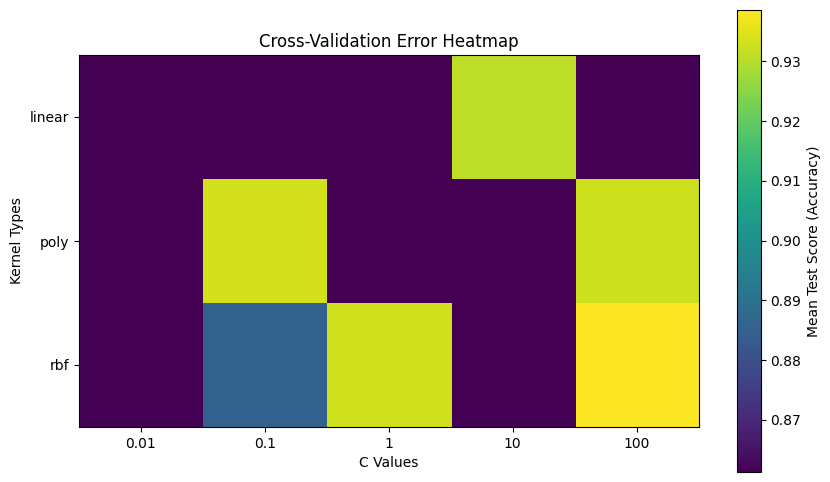

In [ ]:
heatmap_data = mean_test_score.values.reshape((len(param_grid['kernel']), len(param_grid['C'])))

plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, interpolation='nearest')
plt.colorbar(label='Mean Test Score (Accuracy)')
plt.title('Cross-Validation Error Heatmap')
plt.xticks(ticks=range(len(param_grid['C'])), labels=param_grid['C'])
plt.yticks(ticks=range(len(param_grid['kernel'])), labels=param_grid['kernel'])
plt.xlabel('C Values')
plt.ylabel('Kernel Types')
plt.show()


##Task 3 – The final hypothesis


[LP 1] Train your final SVM hypothesis based on cross validation on your entire training dataset. Report
the in-sample error.

In [ ]:
svm_model_rbf = SVC(kernel='rbf', C=100)
svm_model_rbf.fit(X, Y)
in_sample_error_rbf = (1 - np.mean(cross_val_score(svm_model_rbf, X, Y, cv=5)))*100
print("In-sample error:", in_sample_error_rbf,"%")

In-sample error: 6.336630591447423 %


[LP2] Extract the test dataset from the ZipDigits.test file. Note that you do not need to filter this dataset,
similar to the training set in this homework. Report the final test error for the SVM using the parameters
chosen from LP 1.

In [ ]:
test_data = pd.read_csv('ZipDigits.test', header=None, delim_whitespace=True)
test_data['label'] = test_data[0].apply(lambda x: 1 if x == 1 else -1)

# Calculate intensity and symmetry features for test data
test_data['Intensity'] = test_data.apply(lambda row: intensity(row.values[1:]), axis=1)
test_data['Symmetry'] = test_data.apply(lambda row: symmetry(row.values[1:]), axis=1)

X_test = test_data[['Intensity', 'Symmetry']]
Y_test = test_data['label']
test_error = (1 - svm_model_rbf.score(X_test, Y_test))*100
print("Test error:", test_error,"%")

Test error: 7.17488789237668 %


##Task 4 – Overall Learning approach

[HP 1] Collect all the results of your experiments on the digits dataset from previous homework by
reporting the test errors in a table or graph (or whatever visualization you prefer). The models you should
report for are PLA, pocket, pocket with 3 rd order polynomial feature transform, and neural network
trained using the three gradient descent approaches.
Briefly comment on the model with the best and worst test error. Why do you think the models show this
performance? Be brief in your explanation. Please write in your own words, even if you discuss with
others

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Model': ['PLA', 'Pocket', 'Pocket 3rd order', 'SVM', 'Neural Network'],
    'Error Percentage': [24.0, 8.59, 14.41, 7.17, 4.72]  # Assuming Neural Network accuracy is 95.28%
}
df = pd.DataFrame(data)
print(df)




              Model  Error Percentage
0               PLA             24.00
1            Pocket              8.59
2  Pocket 3rd order             14.41
3               SVM              7.17
4    Neural Network              4.72


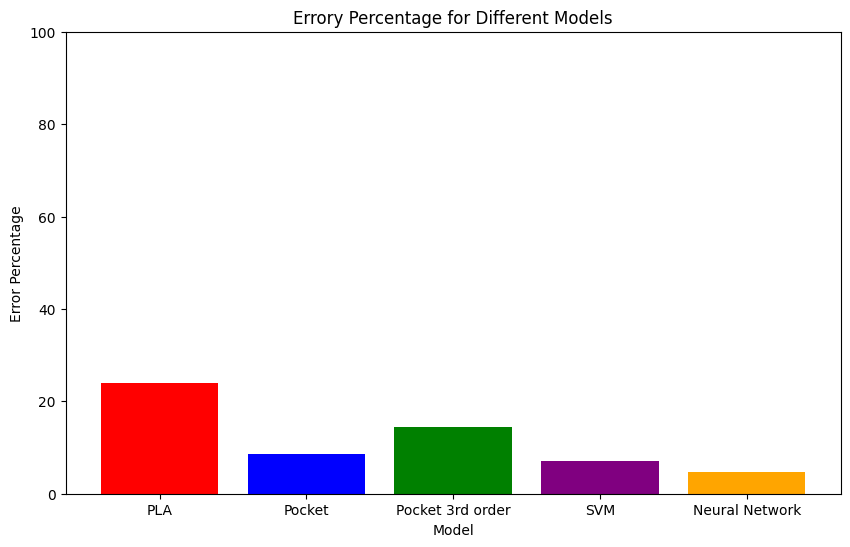

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Error Percentage'], color=['red', 'blue', 'green', 'purple', 'orange'])
plt.title('Errory Percentage for Different Models')
plt.xlabel('Model')
plt.ylabel('Error Percentage')
plt.ylim(0, 100)
plt.show()

The model with the best test accuracy (or least error) is the Neural Network. It is probably due to its ability to capture complex relationships in the data.
The model with the least test accuracy ( or highest error) is PLA. It is a linear classifier, and if the data is not linearly separable, it may struggle to achieve good performance. The simplicity of the model could lead to high errors when faced with more intricate decision boundaries.

[HP 2] Is this approach to choose the best digit classifier appropriate? Comment on a good approach to
choose the best digit classifier using the provided dataset. Think about the size of the dataset, the
complexity of these models, and the parameters you can alter. Be brief in your answer. As always, please
write in your own words, even if you discuss with others or refer to external sources

I would say that it is appropriate. The digits dataset is seems to have some amount of underlying complexity, and this can only be captured by models with higher capacity like Neural networks or SVMs. A large amount of data is also helpful to determine the best g(x) for the data, and a simple linear classifier will not be able to recognize the pattern behind the data. Though computationally expensive, if we have a decent amount of data, it would be best to use a Neural network for identifying the underlying pattern.

##References

https://scikit-learn.org/stable/modules/svm.html

https://stackoverflow.com/questions/77296116/i-am-getting-nan-values-in-grid-search-cross-validation-test-results

Discussed with classmates- Rajat Sharma
